# General imports

**Importing all libraries**

In [1]:
# Used imports -- standard imports
import pandas as pd
import cbsodata
import matplotlib.pyplot as plt
import seaborn as sns

Reading all the cbs data

In [2]:
# Converteer naar een Pandas DataFrame voor gemakkelijke manipulatie
df_algemeen = pd.DataFrame(cbsodata.get_data('83765NED'))

# Converteer naar een Pandas DataFrame voor gemakkelijke manipulatie
df_afstanden = pd.DataFrame(cbsodata.get_data('80305ned'))

# Converteer naar een Pandas DataFrame voor gemakkelijke manipulatie
df_gezondheidsmonitor = pd.DataFrame(cbsodata.get_data('85012NED'))

Gereed maken df_algemeen

In [3]:
df_algemeen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16667 entries, 0 to 16666
Columns: 110 entries, ID to GeweldsEnSeksueleMisdrijven_108
dtypes: float64(65), int64(39), object(6)
memory usage: 14.0+ MB


In [4]:
# Checking for possible values
for col in df_algemeen.columns:
    try:
        print('{} : {}'.format(col,df_algemeen[col].unique()))
    except:
        print(col)

ID : [    0     1     2 ... 16664 16665 16666]
WijkenEnBuurten : ['Nederland' 'Aa en Hunze' 'Wijk 00 Annen' ...
 'Wijk 52 Soestweteringlanden' 'Windesheim' 'Harculo en Hoogzutmen']
Gemeentenaam_1 : ['Nederland                               '
 'Aa en Hunze                             '
 'Aalburg                                 '
 'Aalsmeer                                '
 'Aalten                                  '
 'Achtkarspelen                           '
 'Alblasserdam                            '
 'Albrandswaard                           '
 'Alkmaar                                 '
 'Almelo                                  '
 'Almere                                  '
 'Alphen aan den Rijn                     '
 'Alphen-Chaam                            '
 'Ameland                                 '
 'Amersfoort                              '
 'Amstelveen                              '
 'Amsterdam                               '
 'Apeldoorn                               '
 'Appinged

In [5]:
# Remove trailing spaces from column values
df_algemeen = df_algemeen.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Select only Gemeente specific data
df_algemeen = df_algemeen[(df_algemeen['SoortRegio_2'] == 'Gemeente')]

# Rename columns
df_algemeen.rename(columns={'Gemeentenaam_1': 'Gemeente'}, inplace=True)

# Dropping useless columns
df_algemeen.drop(columns=['ID', 'WijkenEnBuurten', 'SoortRegio_2', 'Codering_3', 'IndelingswijzigingWijkenEnBuurten_4'], inplace=True)

In [6]:
df_algemeen

,Gemeente,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,k_65JaarOfOuder_12,Ongehuwd_13,...,OppervlakteTotaal_99,OppervlakteLand_100,OppervlakteWater_101,MeestVoorkomendePostcode_102,Dekkingspercentage_103,MateVanStedelijkheid_104,Omgevingsadressendichtheid_105,TotaalDiefstalUitWoningSchuurED_106,VernielingMisdrijfTegenOpenbareOrde_107,GeweldsEnSeksueleMisdrijven_108
1,Aa en Hunze,25286,12603,12683,3572,2558,4383,8467,6306,9951,...,27887,27625,262,.,NaN,5.0,279.0,2.0,3.0,2.0
77,Aalburg,13067,6615,6452,2527,1760,3006,3584,2190,5639,...,5317,5041,276,.,NaN,5.0,376.0,1.0,2.0,3.0
100,Aalsmeer,31373,15516,15857,5866,3484,7221,9089,5713,14718,...,3229,2013,1216,.,NaN,4.0,904.0,3.0,3.0,4.0
113,Aalten,27047,13625,13422,4459,2963,5641,8259,5725,12044,...,9705,9654,52,.,NaN,4.0,782.0,2.0,2.0,2.0
147,Achtkarspelen,27893,14185,13708,5112,3284,6404,7891,5202,12565,...,10398,10226,172,.,NaN,5.0,426.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16374,Zundert,21657,11121,10536,2903,2589,4663,6995,4507,9488,...,12121,12070,51,.,NaN,4.0,528.0,5.0,3.0,4.0
16391,Zutphen,47340,23223,24117,7643,5417,10501,14299,9480,21863,...,4293,4096,197,.,NaN,2.0,1614.0,5.0,5.0,6.0
16429,Zwartewaterland,22309,11360,10949,4728,3043,5375,5571,3592,9697,...,8786,8267,518,.,NaN,4.0,705.0,1.0,3.0,2.0
16470,Zwijndrecht,44417,21559,22858,7238,4981,10352,12086,9760,18860,...,2277,2035,243,.,NaN,2.0,2050.0,3.0,4.0,3.0


Gereed maken df_afstanden

In [7]:
df_afstanden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8848 entries, 0 to 8847
Columns: 128 entries, ID to AfstandTotBrandweerkazerne_125
dtypes: float64(125), int64(1), object(2)
memory usage: 8.6+ MB


In [8]:
# Checking for possible values
for col in df_afstanden.columns:
    try:
        print('{} : {}'.format(col,df_afstanden[col].unique()))
    except:
        print(col)

ID : [   0    1    2 ... 8845 8846 8847]
RegioS : ['Nederland' 'Noord-Nederland (LD)' 'Oost-Nederland (LD)'
 'West-Nederland (LD)' 'Zuid-Nederland (LD)' 'Groningen (PV)'
 'Fryslân (PV)' 'Drenthe (PV)' 'Overijssel (PV)' 'Flevoland (PV)'
 'Gelderland (PV)' 'Utrecht (PV)' 'Noord-Holland (PV)' 'Zuid-Holland (PV)'
 'Zeeland (PV)' 'Noord-Brabant (PV)' 'Limburg (PV)' 'Oost-Groningen (CR)'
 'Delfzijl en omgeving (CR)' 'Overig Groningen (CR)'
 'Noord-Friesland (CR)' 'Zuidwest-Friesland (CR)'
 'Zuidoost-Friesland (CR)' 'Noord-Drenthe (CR)' 'Zuidoost-Drenthe (CR)'
 'Zuidwest-Drenthe (CR)' 'Noord-Overijssel (CR)'
 'Zuidwest-Overijssel (CR)' 'Twente (CR)' 'Veluwe (CR)' 'Achterhoek (CR)'
 'Arnhem/Nijmegen (CR)' 'Zuidwest-Gelderland (CR)' 'Utrecht (CR)'
 'Kop van Noord-Holland (CR)' 'Alkmaar en omgeving (CR)' 'IJmond (CR)'
 'Agglomeratie Haarlem (CR)' 'Zaanstreek (CR)' 'Groot-Amsterdam (CR)'
 'Het Gooi en Vechtstreek (CR)' 'Agglomeratie Leiden en Bollenstreek (CR)'
 "Agglomeratie 's-Gravenhage (CR)" 

In [9]:
# Rename columns
df_afstanden.rename(columns={'RegioS': 'Gemeente'}, inplace=True)

# Replace values
df_afstanden["Gemeente"] = df_afstanden["Gemeente"].replace("Beek (L.)", "Beek")
df_afstanden["Gemeente"] = df_afstanden["Gemeente"].replace("Stein (L.)", "Stein")

# Separate Beekdaelen into 3 sepereate gemeentes
# beekdaelen = df_afstanden.loc[df_afstanden['Gemeente'] == 'Beekdaelen']

# schinnen_copy = beekdaelen.copy()
# schinnen_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Schinnen")
# 
# nuth_copy = beekdaelen.copy()
# nuth_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Nuth")
# 
# onderbanken_copy = beekdaelen.copy()
# onderbanken_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Onderbanken")

# Concatenate the copies to the original DataFrame
# df_afstanden = pd.concat([df_afstanden, schinnen_copy, nuth_copy, onderbanken_copy], ignore_index=True)

# Dropping useless columns
df_afstanden.drop(columns=['ID'], inplace=True)

<Axes: >

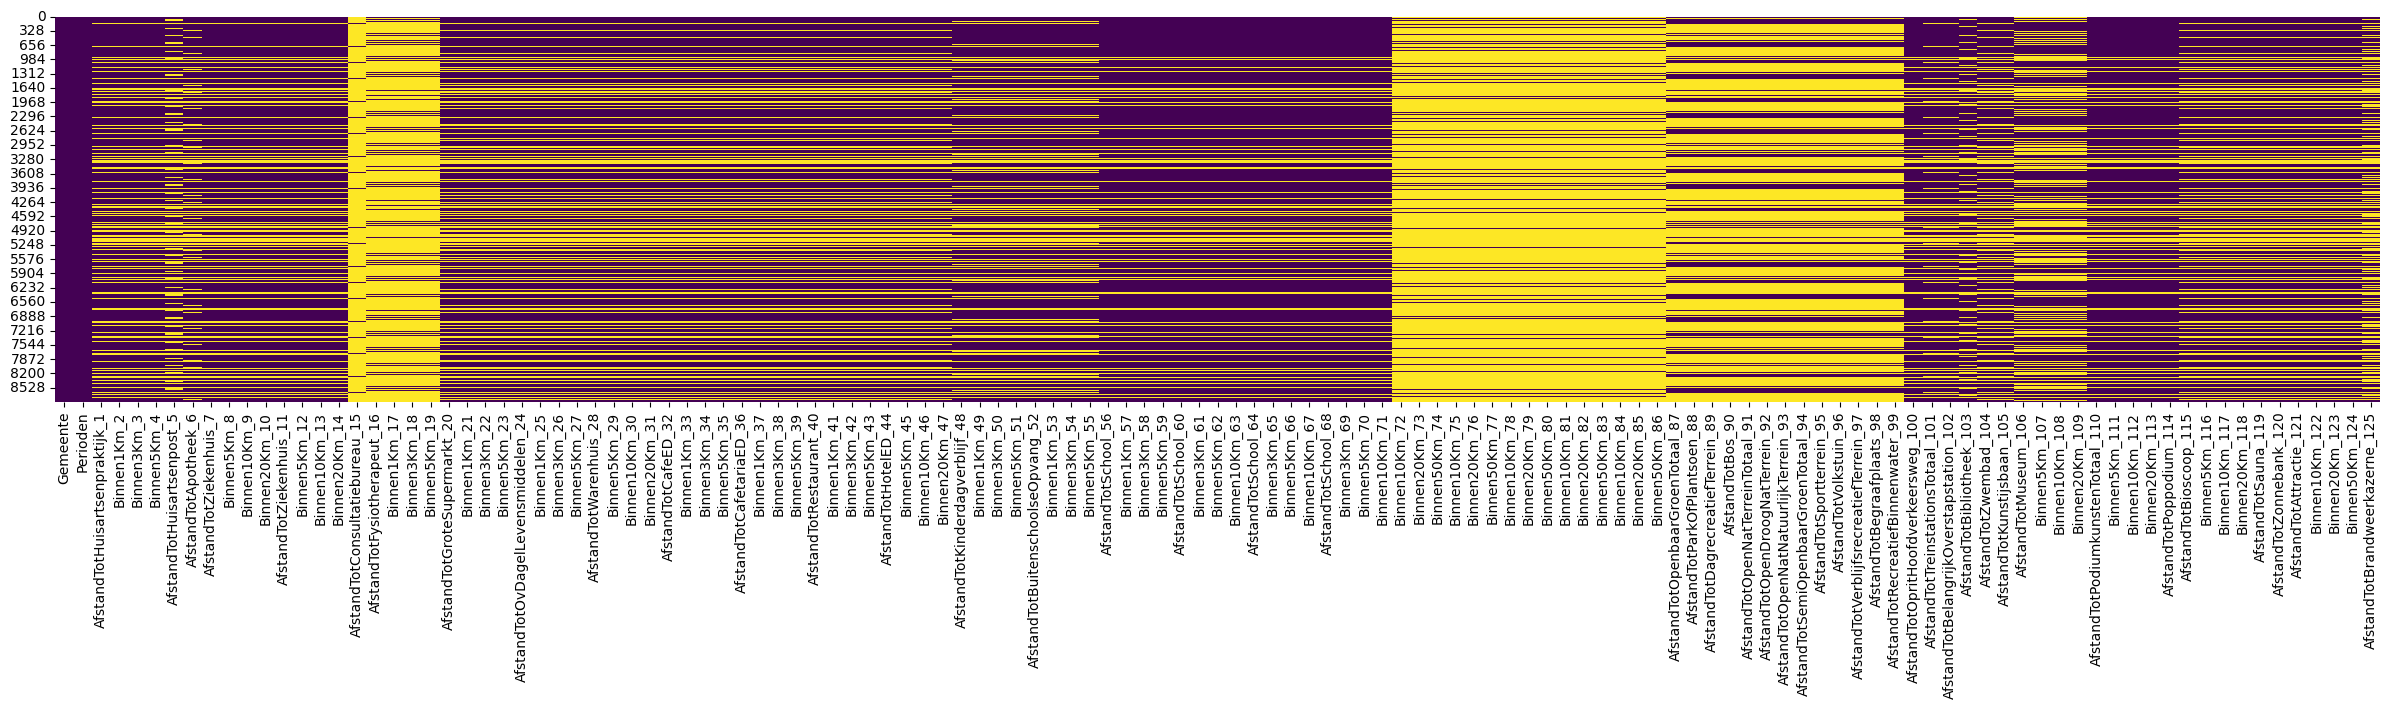

In [10]:
# View a plot with all NaN values Yellow
fig, ax = plt.subplots(figsize=(30, 5))
sns.heatmap(df_afstanden.isnull(),cbar=False,cmap='viridis')

In [11]:
# Sort the DataFrame by gemeente and perioden columns
df_afstanden = df_afstanden.sort_values(['Gemeente', 'Perioden'])

# Group the DataFrame by gemeente
grouped = df_afstanden.groupby('Gemeente')

# Fill missing values with data from the closest year
df_afstanden = grouped.apply(lambda group: group.fillna(method='bfill').fillna(method='ffill'))

# Reset the index to ungroup the DataFrame
df_afstanden = df_afstanden.reset_index(drop=True)

Gereed maken df_gezondheidsmonitor

In [12]:
df_gezondheidsmonitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582 entries, 0 to 3581
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    3582 non-null   int64  
 1   Leeftijd                              3582 non-null   object 
 2   Marges                                3582 non-null   object 
 3   RegioS                                3582 non-null   object 
 4   ErvarenGezondheidGoedZeerGoed_1       3564 non-null   float64
 5   EenOfMeerLangdurigeAandoeningen_2     3561 non-null   float64
 6   EenOfMeerLichamelijkeBeperkingen_3    3561 non-null   float64
 7   BeperkingInHoren_4                    3561 non-null   float64
 8   BeperkingInZien_5                     3561 non-null   float64
 9   BeperkingInBewegen_6                  3561 non-null   float64
 10  Ondergewicht_7                        3552 non-null   float64
 11  NormaalGewicht_8 

In [13]:
# Checking for possible values
for col in df_gezondheidsmonitor.columns:
    try:
        print('{} : {}'.format(col,df_gezondheidsmonitor[col].unique()))
    except:
        print(col)

ID : [   0    1    2 ... 3579 3580 3581]
Leeftijd : ['Totaal' '18 tot 65 jaar' '65 jaar of ouder']
Marges : ['Waarde' 'Ondergrens 95%-interval' 'Bovengrens 95%-interval']
RegioS : ['Nederland' 'Noord-Nederland (LD)' 'Oost-Nederland (LD)'
 'West-Nederland (LD)' 'Zuid-Nederland (LD)' 'Groningen (PV)'
 'Fryslân (PV)' 'Drenthe (PV)' 'Overijssel (PV)' 'Flevoland (PV)'
 'Gelderland (PV)' 'Utrecht (PV)' 'Noord-Holland (PV)' 'Zuid-Holland (PV)'
 'Zeeland (PV)' 'Noord-Brabant (PV)' 'Limburg (PV)' 'Aa en Hunze'
 'Aalsmeer' 'Aalten' 'Achtkarspelen' 'Alblasserdam' 'Albrandswaard'
 'Alkmaar' 'Almelo' 'Almere' 'Alphen aan den Rijn' 'Alphen-Chaam' 'Altena'
 'Ameland' 'Amersfoort' 'Amstelveen' 'Amsterdam' 'Apeldoorn' 'Appingedam'
 'Arnhem' 'Assen' 'Asten' 'Baarle-Nassau' 'Baarn' 'Barendrecht'
 'Barneveld' 'Beek (L.)' 'Beekdaelen' 'Beemster' 'Beesel' 'Berg en Dal'
 'Bergeijk' 'Bergen (L.)' 'Bergen (NH.)' 'Bergen op Zoom' 'Berkelland'
 'Bernheze' 'Best' 'Beuningen' 'Beverwijk' 'De Bilt' 'Bladel' 'Blaric

In [14]:
# Rename columns
df_gezondheidsmonitor.rename(columns={'RegioS': 'Gemeente'}, inplace=True)

# Replace values
df_gezondheidsmonitor["Gemeente"] = df_gezondheidsmonitor["Gemeente"].replace("Beek (L.)", "Beek")
df_gezondheidsmonitor["Gemeente"] = df_gezondheidsmonitor["Gemeente"].replace("Stein (L.)", "Stein")

# Separate Beekdaelen into 3 sepereate gemeentes
beekdaelen = df_gezondheidsmonitor.loc[df_gezondheidsmonitor['Gemeente'] == 'Beekdaelen']

schinnen_copy = beekdaelen.copy()
schinnen_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Schinnen")

nuth_copy = beekdaelen.copy()
nuth_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Nuth")

onderbanken_copy = beekdaelen.copy()
onderbanken_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Onderbanken")

# Concatenate the copies to the original DataFrame
df_gezondheidsmonitor = pd.concat([df_gezondheidsmonitor, schinnen_copy, nuth_copy, onderbanken_copy], ignore_index=True)

# Verkijg alle leeftijds categorieën (aangezien deze niet specifiek genoeg zijn)
df_gezondheidsmonitor = df_gezondheidsmonitor[df_gezondheidsmonitor['Leeftijd'] == 'Totaal']

# Verkijg enkel de marges
df_gezondheidsmonitor = df_gezondheidsmonitor[df_gezondheidsmonitor['Marges'] == 'Waarde']

# Dropping useless columns
df_gezondheidsmonitor.drop(columns=['ID', 'Leeftijd', 'Marges'], inplace=True)

Merge dataframes

In [15]:
# Perform the first merge between df1 and df2
df_cbsodata = pd.merge(df_algemeen, df_afstanden, on="Gemeente", how="inner")

# Perform the second merge between the result of the first merge and df3
df_cbsodata = pd.merge(df_cbsodata, df_gezondheidsmonitor, on="Gemeente", how="inner")

In [16]:
df_cbsodata

,Gemeente,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,k_65JaarOfOuder_12,Ongehuwd_13,...,ErnstigOvergewichtObesitas_11,VoldoetAanBeweegrichtlijn_12,WekelijksSporter_13,Mantelzorger_14,ZwaarBelasteMantelzorgers_15,UrenMantelzorgPerWeek_16,Rokers_17,VoldoetAanRichtlijnAlcoholgebruik_18,ZwareDrinker_19,OvermatigDrinker_20
0,Aa en Hunze,25286,12603,12683,3572,2558,4383,8467,6306,9951,...,14.9,47.3,48.3,16.1,17.1,9.3,14.3,40.6,7.1,5.4
1,Aa en Hunze,25286,12603,12683,3572,2558,4383,8467,6306,9951,...,14.9,47.3,48.3,16.1,17.1,9.3,14.3,40.6,7.1,5.4
2,Aa en Hunze,25286,12603,12683,3572,2558,4383,8467,6306,9951,...,14.9,47.3,48.3,16.1,17.1,9.3,14.3,40.6,7.1,5.4
3,Aa en Hunze,25286,12603,12683,3572,2558,4383,8467,6306,9951,...,14.9,47.3,48.3,16.1,17.1,9.3,14.3,40.6,7.1,5.4
4,Aa en Hunze,25286,12603,12683,3572,2558,4383,8467,6306,9951,...,14.9,47.3,48.3,16.1,17.1,9.3,14.3,40.6,7.1,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,Zwolle,125548,61727,63821,22964,15916,35936,31950,18782,65865,...,11.0,54.6,54.4,13.1,12.2,11.3,17.6,38.4,7.5,5.7
5420,Zwolle,125548,61727,63821,22964,15916,35936,31950,18782,65865,...,11.0,54.6,54.4,13.1,12.2,11.3,17.6,38.4,7.5,5.7
5421,Zwolle,125548,61727,63821,22964,15916,35936,31950,18782,65865,...,11.0,54.6,54.4,13.1,12.2,11.3,17.6,38.4,7.5,5.7
5422,Zwolle,125548,61727,63821,22964,15916,35936,31950,18782,65865,...,11.0,54.6,54.4,13.1,12.2,11.3,17.6,38.4,7.5,5.7


In [17]:
# Checking for possible values
for col in df_cbsodata.columns:
    try:
        print('{}'.format(col))
    except:
        print(col)

Gemeente
AantalInwoners_5
Mannen_6
Vrouwen_7
k_0Tot15Jaar_8
k_15Tot25Jaar_9
k_25Tot45Jaar_10
k_45Tot65Jaar_11
k_65JaarOfOuder_12
Ongehuwd_13
Gehuwd_14
Gescheiden_15
Verweduwd_16
WestersTotaal_17
NietWestersTotaal_18
Marokko_19
NederlandseAntillenEnAruba_20
Suriname_21
Turkije_22
OverigNietWesters_23
GeboorteTotaal_24
GeboorteRelatief_25
SterfteTotaal_26
SterfteRelatief_27
HuishoudensTotaal_28
Eenpersoonshuishoudens_29
HuishoudensZonderKinderen_30
HuishoudensMetKinderen_31
GemiddeldeHuishoudensgrootte_32
Bevolkingsdichtheid_33
Woningvoorraad_34
GemiddeldeWoningwaarde_35
PercentageEengezinswoning_36
PercentageMeergezinswoning_37
PercentageBewoond_38
PercentageOnbewoond_39
Koopwoningen_40
HuurwoningenTotaal_41
InBezitWoningcorporatie_42
InBezitOverigeVerhuurders_43
EigendomOnbekend_44
BouwjaarVoor2000_45
BouwjaarVanaf2000_46
GemiddeldElektriciteitsverbruikTotaal_47
Appartement_48
Tussenwoning_49
Hoekwoning_50
TweeOnderEenKapWoning_51
VrijstaandeWoning_52
Huurwoning_53
EigenWoning_54
Gemid

In [18]:
# Checking for possible values
for col in df_cbsodata.columns:
    try:
        print('{} : {}'.format(col,df_cbsodata[col].unique()))
    except:
        print(col)

Gemeente : ['Aa en Hunze' 'Aalsmeer' 'Aalten' 'Achtkarspelen' 'Alblasserdam'
 'Albrandswaard' 'Alkmaar' 'Almelo' 'Almere' 'Alphen aan den Rijn'
 'Alphen-Chaam' 'Ameland' 'Amersfoort' 'Amstelveen' 'Amsterdam'
 'Apeldoorn' 'Appingedam' 'Arnhem' 'Assen' 'Asten' 'Baarle-Nassau' 'Baarn'
 'Barendrecht' 'Barneveld' 'Beek' 'Beemster' 'Beesel' 'Berg en Dal'
 'Bergeijk' 'Bergen (L.)' 'Bergen (NH.)' 'Bergen op Zoom' 'Berkelland'
 'Bernheze' 'Best' 'Beuningen' 'Beverwijk' 'De Bilt' 'Bladel' 'Blaricum'
 'Bloemendaal' 'Bodegraven-Reeuwijk' 'Boekel' 'Borger-Odoorn' 'Borne'
 'Borsele' 'Boxmeer' 'Boxtel' 'Breda' 'Brielle' 'Bronckhorst' 'Brummen'
 'Brunssum' 'Bunnik' 'Bunschoten' 'Buren' 'Capelle aan den IJssel'
 'Castricum' 'Coevorden' 'Cranendonck' 'Cuijk' 'Culemborg' 'Dalfsen'
 'Dantumadiel' 'Delft' 'Delfzijl' 'Deurne' 'Deventer' 'Diemen'
 'Dinkelland' 'Doesburg' 'Doetinchem' 'Dongen' 'Dordrecht' 'Drechterland'
 'Drimmelen' 'Dronten' 'Druten' 'Duiven' 'Echt-Susteren' 'Edam-Volendam'
 'Ede' 'Eemnes' '

In [19]:
# Remove all _number
df_cbsodata.columns = df_cbsodata.columns.str.replace('_\d+', '', regex=True)

Export data

In [20]:
df_cbsodata.to_csv('cbsdata_prep.csv', index=False)